In [1]:
from importlib import reload

In [2]:
import experiment
import load_util

In [3]:
import pandas as pd
pd.set_option("mode.chained_assignment", None)

In [4]:
project_df = load_util.load_projects()

In [5]:
feature_cols = [
    'country_code', 
    'donor_name', 
    'aiddata_sectorname', 
    'six_overall_rating', 
    'start_date', 
    'completion_date', 
    'project_duration',
    'sector',
    'wb_government_partner_rating'
]

In [6]:
pdf = load_util.narrow_convert_project_data(project_df, feature_cols)

In [7]:
education_outcome_indicators = [
    'SE.PRM.NENR', 
    'SE.PRM.CMPT.ZS', 
    'SE.PRM.PRSL.ZS'
]

In [17]:
refutations = [
    ('random_common_cause', {}), 
    ('placebo_treatment_refuter', dict(placebo_type="permuter")),
    ('data_subset_refuter', dict(subset_fraction=0.9)),
    ('bootstrap_refuter', {})
#     ('dummy_outcome_refuter', 
]

Constructing or loading sector table
Columns so far:  Index(['year', 'country', 'education_lag_1_growth', 'education_lag_1_count',
       'education_lag_2_growth', 'education_lag_2_count',
       'education_lag_3_growth', 'education_lag_3_count',
       'education_lag_4_growth', 'education_lag_4_count',
       'education_lag_5_growth', 'education_lag_5_count',
       'education_lag_6_growth', 'education_lag_6_count',
       'education_lag_7_growth', 'education_lag_7_count',
       'education_lag_8_growth', 'education_lag_8_count',
       'education_lag_9_growth', 'education_lag_9_count',
       'education_lag_-4_growth', 'education_lag_-4_count',
       'project_completed_year', 'most_recent_govt_rating'],
      dtype='object')
N pre NA drop:  9856  and post:  418


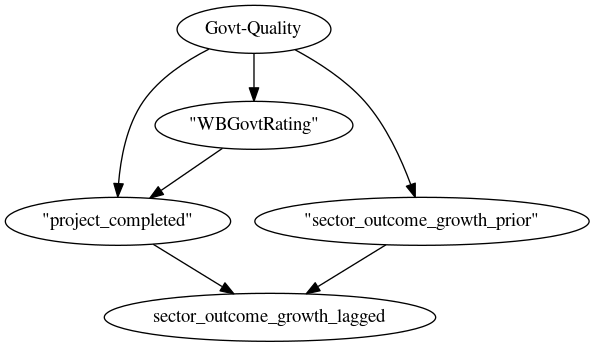

/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scal

/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scal

In [22]:
education_result = experiment.run_sector_experiment(
    pdf, 'Education', education_outcome_indicators, refuters_to_run=refutations,
    persist_lag_table=False, verbose=True
)

In [23]:
print(education_result['estimates'][0])

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
─────────────────────────(Expectation(sector_delta_post|most_recent_govt_ratin
d[project_completed_year]                                                     

                      
g,sector_delta_prior))
                      
Estimand assumption 1, Unconfoundedness: If U→{project_completed_year} and U→sector_delta_post then P(sector_delta_post|project_completed_year,most_recent_govt_rating,sector_delta_prior,U) = P(sector_delta_post|project_completed_year,most_recent_govt_rating,sector_delta_prior)

## Realized estimand
b: sector_delta_post~project_completed_year+most_recent_govt_rating+sector_delta_prior+project_completed_year*sector_delta_prior
Target units: ate

## Estimate
Mean value: -0.02656059538348088
p-value: [0.76785277]
### Conditional Estimates
__catego

In [24]:
for refutation in education_result['refutations']:
    print(refutation)

Refute: Add a Random Common Cause
Estimated effect:-0.02656059538348088
New effect:-0.021205620132172864

Refute: Use a Placebo Treatment
Estimated effect:-0.02656059538348088
New effect:-0.00046379074826337965
p value:0.48

Refute: Use a subset of data
Estimated effect:-0.02656059538348088
New effect:-0.024693100931762288
p value:0.45999999999999996

Refute: Bootstrap Sample Dataset
Estimated effect:-0.02656059538348088
New effect:-0.017069498803606163
p value:0.34



In [25]:
education_result['causal_df'].head()

,sector_delta_prior,most_recent_govt_rating,project_completed_year,sector_delta_post
6740,1.054704,5.0,False,1.070766
6756,1.031744,5.0,False,1.058141
6768,0.945296,5.0,False,1.025123
6808,0.860547,5.0,False,1.457767
6811,0.904910,5.0,False,1.145429


## Now running on health

In [26]:
health_outcome_indicators = [
    'SH.DYN.MORT',
    'SH.IMM.MEAS',
    'SH.STA.MALN.ZS'
]

In [27]:
reload(experiment)

<module 'experiment' from '/home/luke/newproj/wbwdi/src/experiment.py'>

Constructing or loading sector table
Columns so far:  Index(['year', 'country', 'health_lag_1_growth', 'health_lag_1_count',
       'health_lag_2_growth', 'health_lag_2_count', 'health_lag_3_growth',
       'health_lag_3_count', 'health_lag_4_growth', 'health_lag_4_count',
       'health_lag_5_growth', 'health_lag_5_count', 'health_lag_6_growth',
       'health_lag_6_count', 'health_lag_7_growth', 'health_lag_7_count',
       'health_lag_8_growth', 'health_lag_8_count', 'health_lag_9_growth',
       'health_lag_9_count', 'health_lag_-4_growth', 'health_lag_-4_count',
       'project_completed_year', 'most_recent_govt_rating'],
      dtype='object')
N pre NA drop:  9856  and post:  879


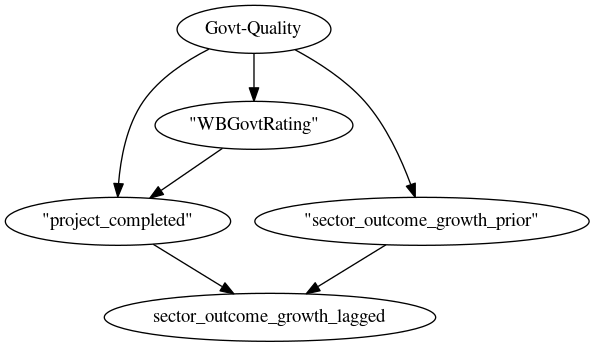

In [32]:
health_result = experiment.run_sector_experiment(
    pdf, 'Health', health_outcome_indicators, persist_lag_table=True, verbose=True,
    refuters_to_run=refutations[:2]
)

In [33]:
print(health_result['estimates'][0])

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
─────────────────────────(Expectation(sector_delta_post|most_recent_govt_ratin
d[project_completed_year]                                                     

                      
g,sector_delta_prior))
                      
Estimand assumption 1, Unconfoundedness: If U→{project_completed_year} and U→sector_delta_post then P(sector_delta_post|project_completed_year,most_recent_govt_rating,sector_delta_prior,U) = P(sector_delta_post|project_completed_year,most_recent_govt_rating,sector_delta_prior)

## Realized estimand
b: sector_delta_post~project_completed_year+most_recent_govt_rating+sector_delta_prior+project_completed_year*sector_delta_prior
Target units: ate

## Estimate
Mean value: -0.0067068421881814055
p-value: [0.00147066]
### Conditional Estimates
__cate

In [35]:
for refutation in health_result['refutations']:
    print(refutation)

Refute: Add a Random Common Cause
Estimated effect:-0.0067068421881814055
New effect:-0.006444864262563188

Refute: Use a Placebo Treatment
Estimated effect:-0.0067068421881814055
New effect:-0.00015715158440613775
p value:0.47



In [36]:
health_results['causal_df'].head()

,sector_delta_prior,most_recent_govt_rating,project_completed_year,sector_delta_post
6688,1.198972,6.0,False,0.973212
6693,1.069588,2.0,False,1.018820
6695,1.011294,5.0,True,0.967508
6697,1.044565,5.0,False,0.962925
6712,1.019802,5.0,False,1.138604


In [38]:
health_result['reference_df'].sector_delta_prior.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: sector_delta_prior, dtype: float64

**Note**: Need to do an inversion on mortality

## Now running on water & sanitation

In [39]:
wash_outcome_indicators = [
    'SH.H2O.SAFE.ZS',
    'SH.STA.ACSN'
]

Constructing or loading sector table
Columns so far:  Index(['year', 'country', 'wash_lag_1_growth', 'wash_lag_1_count',
       'wash_lag_2_growth', 'wash_lag_2_count', 'wash_lag_3_growth',
       'wash_lag_3_count', 'wash_lag_4_growth', 'wash_lag_4_count',
       'wash_lag_5_growth', 'wash_lag_5_count', 'wash_lag_6_growth',
       'wash_lag_6_count', 'wash_lag_7_growth', 'wash_lag_7_count',
       'wash_lag_8_growth', 'wash_lag_8_count', 'wash_lag_9_growth',
       'wash_lag_9_count', 'wash_lag_-4_growth', 'wash_lag_-4_count',
       'project_completed_year', 'most_recent_govt_rating'],
      dtype='object')
N pre NA drop:  9856  and post:  844


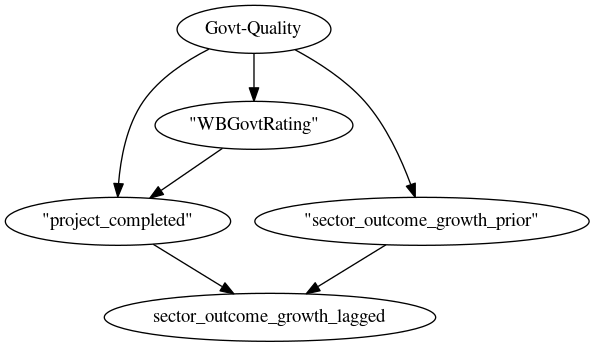

/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scal

/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scal

/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scal

/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scal

/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scal

In [44]:
was_result = experiment.run_sector_experiment(
    pdf, 'WASH', wash_outcome_indicators, persist_lag_table=True, verbose=True,
    refuters_to_run=refutations
)

In [43]:
print(was_result['estimates'][0])

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
─────────────────────────(Expectation(sector_delta_post|most_recent_govt_ratin
d[project_completed_year]                                                     

                      
g,sector_delta_prior))
                      
Estimand assumption 1, Unconfoundedness: If U→{project_completed_year} and U→sector_delta_post then P(sector_delta_post|project_completed_year,most_recent_govt_rating,sector_delta_prior,U) = P(sector_delta_post|project_completed_year,most_recent_govt_rating,sector_delta_prior)

## Realized estimand
b: sector_delta_post~project_completed_year+most_recent_govt_rating+sector_delta_prior+project_completed_year*sector_delta_prior
Target units: ate

## Estimate
Mean value: -1.5543122344752192e-15
p-value: [2.92276584e-223]
### Conditional Estimates


In [45]:
for refutation in was_result['refutations']:
    print(refutation)

Refute: Add a Random Common Cause
Estimated effect:-1.5543122344752192e-15
New effect:-3.1086244689504383e-15

Refute: Use a Placebo Treatment
Estimated effect:-1.5543122344752192e-15
New effect:7.642363096580285e-05
p value:0.47

Refute: Use a subset of data
Estimated effect:-1.5543122344752192e-15
New effect:1.1102230246251565e-16
p value:0.12

Refute: Bootstrap Sample Dataset
Estimated effect:-1.5543122344752192e-15
New effect:-4.218847493575595e-17
p value:0.07



In [46]:
was_result['causal_df'].head()

,sector_delta_prior,most_recent_govt_rating,project_completed_year,sector_delta_post
6688,0.918110,6.0,False,1.080782
6693,1.003198,2.0,False,0.996802
6695,0.950609,5.0,False,1.143622
6697,0.991158,5.0,False,1.008290
6712,1.002912,5.0,False,1.026078


In [47]:
was_result['reference_df'].head()

,year,country,wash_lag_1_growth,wash_lag_1_count,wash_lag_2_growth,wash_lag_2_count,wash_lag_3_growth,wash_lag_3_count,wash_lag_4_growth,wash_lag_4_count,...,wash_lag_8_growth,wash_lag_8_count,wash_lag_9_growth,wash_lag_9_count,wash_lag_-4_growth,wash_lag_-4_count,project_completed_year,most_recent_govt_rating,sector_delta_prior,sector_delta_post
0,1956,CHN,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,False,NaN,NaN,NaN
1,1956,COO,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,False,NaN,NaN,NaN
2,1956,PHI,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,False,NaN,NaN,NaN
3,1956,NEP,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,False,NaN,NaN,NaN
4,1956,SRI,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,False,NaN,NaN,NaN


## Next to do:

* Check stability of WB government rating
* Look into stability of estimates
* Look at more advanced estimator methods
* Do some causal discovery
* Feature exploration machinery
* Talk to people